<heading>
    <h5>Gaussian Filter :</h5>
</heading>
<hr size="2" noshade="True">
<body>
    <p>
    A Gaussian Filter is a low pass filter used for reducing noise (attenuating high frequency signals.) & blurring regions of an image. Its amplitude Bode plot (the log scale in the frequency domain) is a parabola. The filter is implemented as an Odd sized Symmetric Kernel ( DIP version of a Matrix ) which is passed through each pixel of the Region of Interest to get the desired effect.<br>
    </p>
    <p>
    The kernel is not hard towards drastic color changed (edges) due to it the pixels towards the center of the kernel having more weightage towards the final value then the periphery.In practice, it is best to take advantage of the Gaussian blur’s separable property by dividing the process into two passes. In the first pass, a one-dimensional kernel is used to blur the image in only the horizontal or vertical direction. In the second pass, the same one-dimensional kernel is used to blur in the remaining direction. The resulting effect is the same as convolving with a two-dimensional kernel in a single pass, but requires fewer calculations. 
    </p>
    <p>
        In the process of using Gaussian Filter on an image a gaussian Kernel is used firstly by defining the size of the Kernel that would be used for demising the image, which are generally odd numbers. Also the Kernels are symmetric & therefore have the same number of rows and column. The values inside the kernel are computed by the Gaussian function, which is as follows:
        $$ G(x,y) = \frac{1}{2\pi\sigma^2}e^{-\frac{x^2+y^2}{2\sigma^2}} $$
        where x, y are respective Coordinate Values, $\sigma$ is standrd deviation.<br>
        In this approach the usage of Gaussian Kernel is done with the function, cv2.GaussianBlur(). We should specify the width and height of the kernel which should be positive and odd. We also should specify the standard deviation in the X and Y directions, sigmaX and sigmaY respectively. If only sigmaX is specified, sigmaY is taken as equal to sigmaX.
        <br>
    </p>
</body>

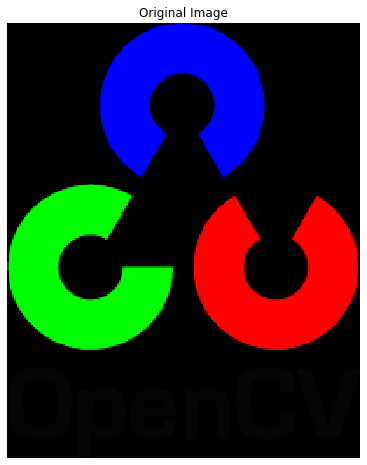

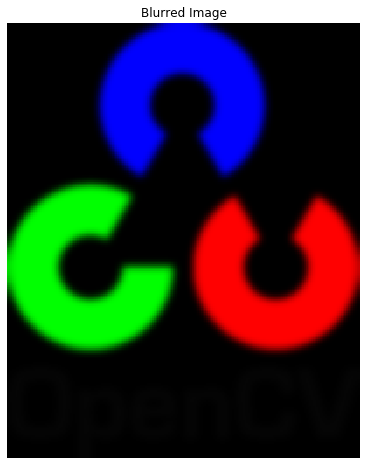

In [1]:
##  Gaussian Filter 

# Import required modules
import cv2 as cv  # OpenCV
import numpy as np  # Numerical Python
import urllib.request as url  # URL Library
import matplotlib.pyplot as plt  # Mathematical Plot Library

# The Image address as url 
link = "https://raw.githubusercontent.com/Omegaconstant/Triphibian-Automation-App/main/Automation/7/image.png"

# Extract the content of the link
url_response = url.urlopen(link)

# Convert the image to a numpy array
img_array = np.array(bytearray(url_response.read()), dtype=np.uint8)

# Decode the image
img = cv.imdecode(img_array, -1)

# Apply Gaussian Blur
blur_gaussian = cv.GaussianBlur(img,(13,13),0)

# Arguments :
# cv.GaussianBlur(img, ksize, sigmaX, sigmaY)
# img - input image.
# ksize - kernel size to be used for box filter.
# sigmaX - standard deviation in x-direction.
# sigmaY - standard deviation in y-direction.

# Plot the Original image
plt.figure( figsize = [8,8] )  # Set figure size
plt.axis( "off" )  # Switch off the axes
plt.title( "Original Image" )  # Set image title
plt.imshow( img )  # Show the original image
plt.show() # Show image

# Plot the Blurred image
plt.figure( figsize = [8,8] )  # Set figure size
plt.axis( "off" )  # Switch off the axes
plt.title( "Blurred Image" )  # Set image title
plt.imshow( blur_gaussian )  # Show the blurred image
plt.show() # Show image


<heading>
    <h5>Bilateral Filter :</h5>
</heading>
<hr size="2" noshade="True">
<body>
    <p>
     A bilateral filter is a non-linear, edge-preserving, and noise-reducing smoothing filter for images. It replaces the intensity of each pixel with a weighted average of intensity values from nearby pixels.<br>
    </p>
    <p>
        The mathematical representation is as follows : 
        $$ BF[I]_P = \frac{1}{W_P}\sum_{q\epsilon S}G_{\sigma_S} || p - q || G_{\sigma_r}(|I_P-I_q|)Iq $$
        where $\frac{1}{W_P}$ is the weighing factor, $G_{\sigma_S} || p - q ||$ is the space weight & $G_{\sigma_r}(|I_P-I_q|)$ is the range weight.<br> 
     The normalization factor and the range weight are new terms added to the previous equation. \sigma_s  denotes the spatial extent of the kernel, i.e. the size of the neighborhood, and \sigma_r  denotes the minimum amplitude of an edge. It ensures that only those pixels with intensity values similar to that of the central pixel are considered for blurring, while sharp intensity changes are maintained. The smaller the value of \sigma_r  , the sharper the edge. As \sigma_r  tends to infinity, the equation tends to a Gaussian blur.
        <br>
    </p>
</body>

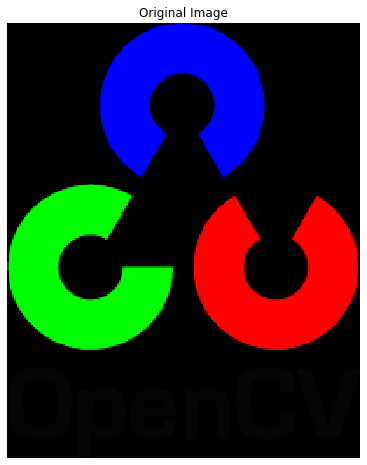

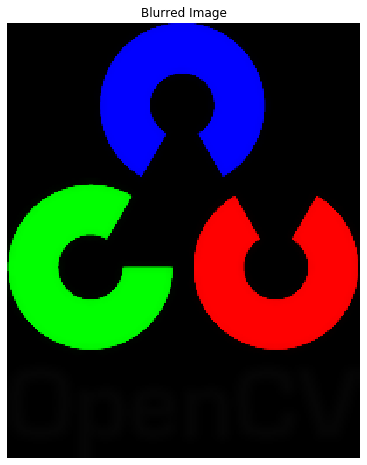

In [2]:
##  Bilateral Filter 

# Apply Gaussian Blur
blur_bilateral = cv.bilateralFilter(img,9,75,75)

# Arguments :
# cv.bilateralFilter(src, d, sigmaColor, sigmaSpace[, dst[, borderType]]
# src - input img
# d - Diameter of each pixel neighborhood that is used during filtering. 
# sigmaColor - Filter sigma in the color space. 
# sigmaSpace - Filter sigma in the coordinate space. 
# borderType - border mode used to extrapolate pixels outside of the image


# Plot the Original image
plt.figure( figsize = [8,8] )  # Set figure size
plt.axis( "off" )  # Switch off the axes
plt.title( "Original Image" )  # Set image title
plt.imshow( img )  # Show the original image
plt.show() # Show image

# Plot the Blurred image
plt.figure( figsize = [8,8] )  # Set figure size
plt.axis( "off" )  # Switch off the axes
plt.title( "Blurred Image" )  # Set image title
plt.imshow( blur_bilateral )  # Show the blurred image
plt.show() # Show image


<heading>
    <h5>Gaussian vs Bilateral Filter :</h5>
</heading>
<hr size="2" noshade="True">
<body>
    <p>
    
The Gaussian filter corresponds to isotropic diffusion. Its application to an image will blur it uniformly, whatever the image content, edges, etc.
<br>
The bilateral filter is almost like a Gaussian filter, except that the Gaussian is modulated by a function that computes the similarity between the central pixel (where the filter is applied) and a pixel in its neighborhood (that is used in blurring).
<br>
If the two pixel values are very close, it multiplies the Gaussian coefficient by something close to 1, and hence it is equivalent to Gaussian filtering.
        <br>
If the pixel values are very different , it will multiply the Gaussian coefficient by a number close to 0, thus turning off the Gaussian filtering for this pixel.
        <br>
This behaviour yields the following result: Gaussian filtering in uniform areas of the image, no filtering across object borders. The bilateral filter will produce a more pleasant results, because it will avoid the introduction of blur between objects while still removing noise in uniform areas.
        <br>
    </p>
</body>

<heading>
    <h5>Documentary References :</h5>
</heading>
<hr size="2" noshade="True">
<body>
    <ol>
        <li><a href="https://en.wikipedia.org/wiki/Gaussian_blur">Gaussian-Blur_Wikipedia</a></li>
        <li><a href="https://en.wikipedia.org/wiki/Bilateral_filter">Bilateral-Filter_Wikipedia</a></li>
        <li><a href="https://docs.opencv.org/4.x/d4/d86/group__imgproc__filter.html#gaabe8c836e97159a9193fb0b11ac52cf1">Gaussian-Blur_OpenCV</a></li>
        <li><a href="https://docs.opencv.org/4.x/d4/d86/group__imgproc__filter.html#ga9d7064d478c95d60003cf839430737ed">Bilateral-Filter_OpenCV</a></li>
        <li><a href="https://dsp.stackexchange.com/questions/8316/the-difference-between-bilateral-filter-and-gaussian-filter">Difference_btwn_Gaussian_&_Bilateral</a></li>
        
</body>